In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [53]:
df['TV + radio'] = df['TV'] * df['radio']
df.head()

,TV,radio,newspaper,sales,TV + radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [54]:
df.corr()

,TV,radio,newspaper,sales,TV + radio
TV,1.000000,0.054809,0.056648,0.782224,0.662160
radio,0.054809,1.000000,0.354104,0.576223,0.681392
newspaper,0.056648,0.354104,1.000000,0.228299,0.251706
sales,0.782224,0.576223,0.228299,1.000000,0.963932
TV + radio,0.662160,0.681392,0.251706,0.963932,1.000000


In [55]:
df.corr()[['sales']]

,sales
TV,0.782224
radio,0.576223
newspaper,0.228299
sales,1.000000
TV + radio,0.963932


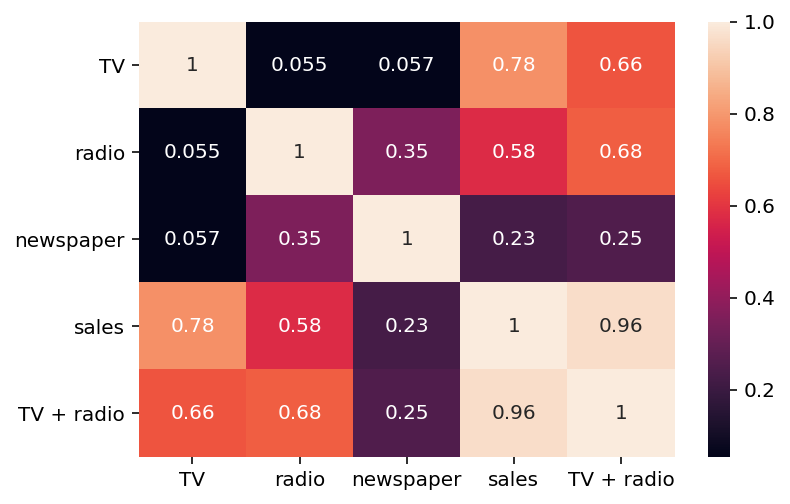

In [56]:
sns.heatmap(df.corr(), annot=True);

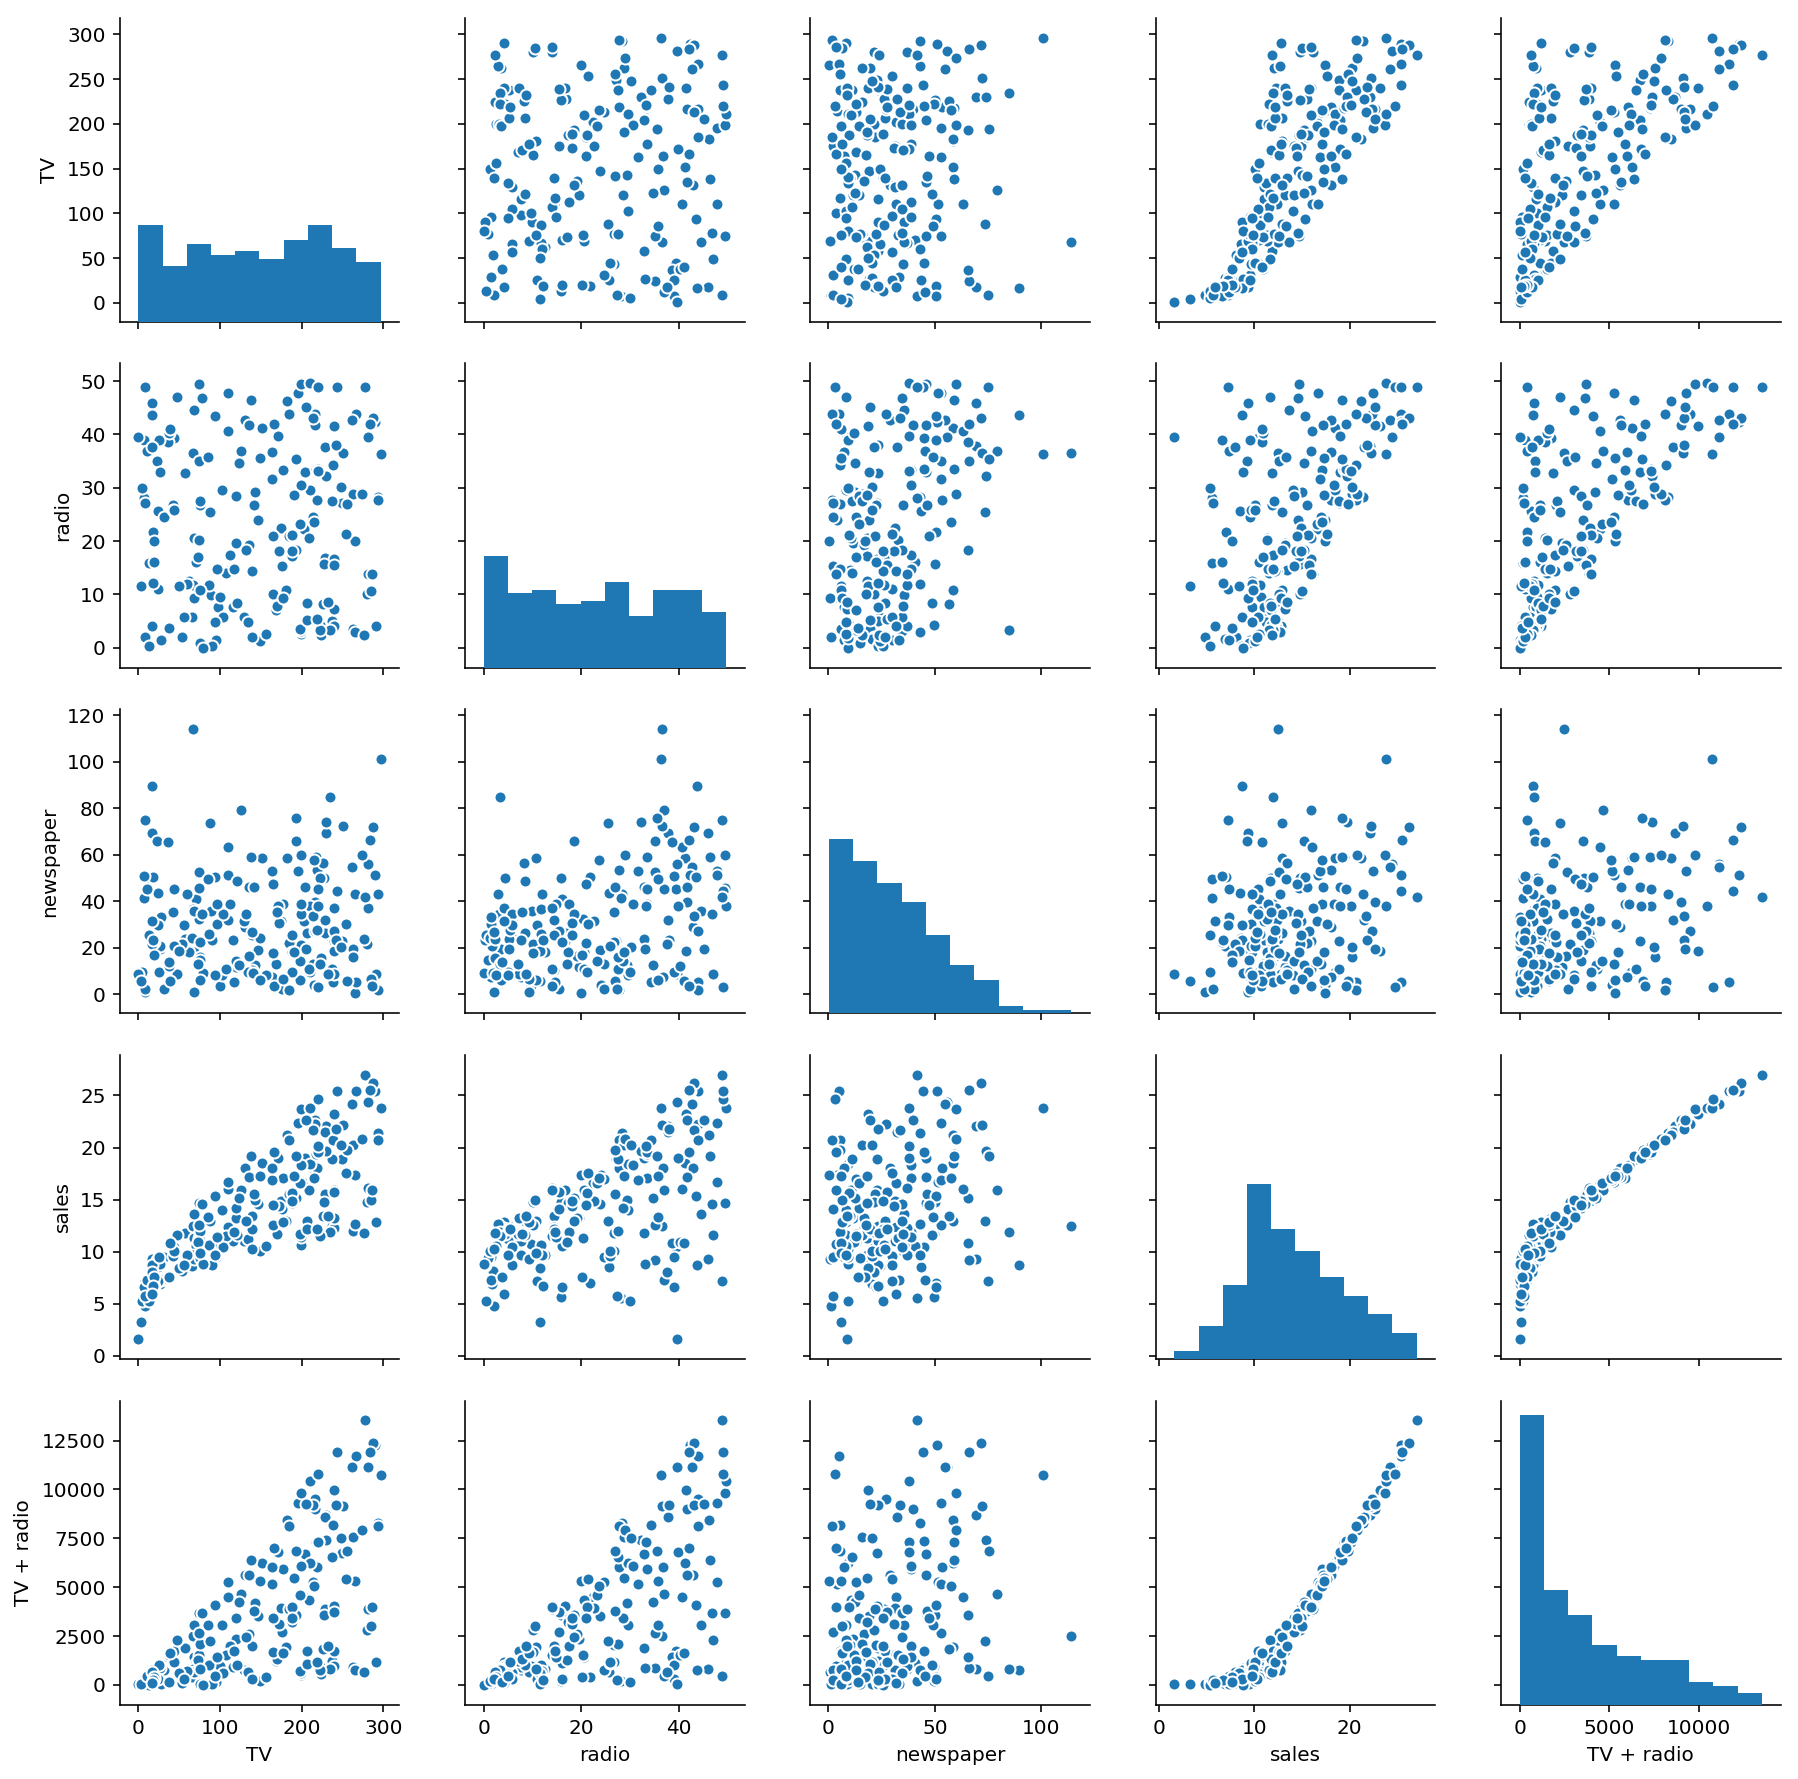

In [57]:
sns.pairplot(df);

In [58]:
df[['radio', 'sales']].head()

,radio,sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


In [61]:
features = ['TV', 'radio', 'newspaper','TV + radio']
X = df[features]
y = df['sales']

In [62]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.9678222434748514

In [63]:
df.head()

,TV,radio,newspaper,sales,TV + radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [66]:
features = ['TV', 'radio', 'newspaper']
X = df[features]

poly = PolynomialFeatures(include_bias=False)

X_poly = poly.fit_transform(X)
X_poly.shape

(200, 9)

In [67]:
lr = LinearRegression()
lr.fit(X_poly, y)
lr.score(X_poly,y)

0.9865057435307856

In [68]:
poly.get_feature_names(['TV', 'radio', 'newspaper'])

['TV',
 'radio',
 'newspaper',
 'TV^2',
 'TV radio',
 'TV newspaper',
 'radio^2',
 'radio newspaper',
 'newspaper^2']